<a href="https://colab.research.google.com/github/dhiotherik/dhioo/blob/main/Copy_of_Main_Project___Dhio_S_B_Therik___1101194399.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# Import necessary library to create a plot
import numpy as np 
import matplotlib.pyplot as plt

Assigning a lambda fuction to convert **Number to Logaritimic**

In [40]:
NtL = lambda n: 10*np.log10(n)

Assigning a lambda function to convert **Logaritmic to Number**

In [41]:
LtN = lambda x: 10**(x/10)

Creating **PATHLOSS MODEL COST 231** Function

In [42]:
def pathloss(fq,types,ht,hr,d):

  # If frequency is define by the range number in MHz then will result to assigned Ca and Cb values
  if fq in range(150,1501):
    Ca=69.55
    Cb=26.16
  elif fq in range(1501,2001):
    Ca=46.3
    Cb=33.9
  else:
    Ca = print("The given frequency does not meet the C1 criteria.")
    Cb = print("The given frequency does not meet the C2 criteria.")
    return Ca,Cb
  
  # Based on area type
  if types == 'urban' :
    cm=0
  elif types == 'suburban' :
    cm=-2*((np.log10((fq/28)**2))-5.4)
  elif types == 'open':
    cm=-4.78*(np.log10(fq))+18.33*(np.log10(fq))-40.94
  else:
    cm=print('The given area type(s) is not suitable for this parameter')
  
  # a(hr) value is
  ahr = (1.1*np.log10(fq)-0.7)*hr-(1.56*np.log10(fq)-1.8)

  # Calculating Path Loss Model
  Lp = Ca+(Cb*np.log10(fq))-(13.83*np.log10(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-cm
  return Lp

In [43]:
# The Given input the Pathloss Model Cost 231 for Different Area and Frequency

# fq is the frequency in range of 150 to 2000 MHz
# ht is the height of antenna transmitter in range of 30 to 200 m
# hr is the height of antenna receiver in range of 1 to 20 m
# types is the type of area given
# d is the distance between the transmitter and receiver in m

fq1=700 #in Mhz
fq2=900 #in Mhz
fq3=1800 #in MHz
loc1='urban'
loc2='suburban'
loc3='open'
tower=80 #in m
user=1.5 #in m
dmin=300 #in m
dmax=1000 #in m
N=200 #dots
d=np.random.randint(dmin,dmax,N)

# Print the randon integer of Urban area distance input
print(d) 

[837 814 624 721 599 356 693 819 436 942 675 469 741 364 561 653 394 728
 787 662 589 644 535 934 873 833 983 848 928 707 497 597 765 996 769 977
 559 749 948 495 974 460 618 773 530 709 774 687 728 678 445 361 626 479
 985 985 710 350 965 521 782 642 515 579 573 981 588 666 729 507 741 625
 749 627 883 672 451 315 672 887 961 348 506 348 967 628 955 573 455 619
 946 370 716 355 990 798 700 544 421 934 800 393 912 946 372 942 489 560
 779 582 604 511 684 774 932 877 301 461 505 556 956 459 531 589 625 393
 314 636 761 573 496 463 892 848 530 540 876 363 618 592 453 699 491 576
 469 307 443 354 840 678 497 649 972 635 673 443 321 735 462 632 558 937
 635 834 337 525 452 677 737 815 872 527 947 903 698 491 960 705 380 320
 912 943 387 664 345 757 407 490 643 682 772 816 642 819 800 468 633 965
 437 962]


In [44]:
# Define Pathloss Cost 231 Model for Area by the given input
LpUrban=pathloss(fq3,loc1,tower,user,d)
LpSubUrban=pathloss(fq3,loc2,tower,user,d)
LpOpen=pathloss(fq3,loc3,tower,user,d)

# Sort Distance for Area 
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSubUrban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

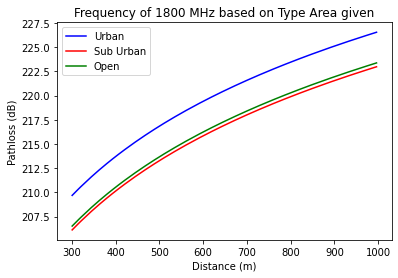

In [45]:
fig, ax = plt.subplots()
ax.plot(d_sort,Urban_sort, color='b', label='Urban')
ax.plot(d_sort,Suburban_sort, color='r', label='Sub Urban')
ax.plot(d_sort,Open_sort, color='g', label='Open')
ax.set_title('Frequency of 1800 MHz based on Type Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Pathloss (dB)')
ax.legend(loc='upper left')
plt.show()

In [46]:
# Define Pathloss Cost 231 Model for Frequency by the given input
LpUrbanFQ1=pathloss(fq1,loc1,tower,user,d)
LpUrbanFQ2=pathloss(fq2,loc1,tower,user,d)
LpUrbanFQ3=pathloss(fq3,loc1,tower,user,d)

# Sort Distance for Area 
d_sort=d[np.argsort(d)]
UrbanFQ_sort=LpUrbanFQ1[np.argsort(d)]
UrbanFQ2_sort=LpUrbanFQ2[np.argsort(d)]
UrbanFQ3_sort=LpUrbanFQ3[np.argsort(d)]

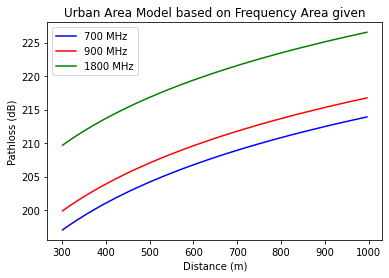

In [47]:
fig, ax = plt.subplots()
ax.plot(d_sort,UrbanFQ_sort, color='b', label='700 MHz')
ax.plot(d_sort,UrbanFQ2_sort, color='r', label='900 MHz')
ax.plot(d_sort,UrbanFQ3_sort, color='g', label='1800 MHz')
ax.set_title('Urban Area Model based on Frequency Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Pathloss (dB)')
ax.legend(loc='upper left')
plt.show()

Creating **Power Receive Model (Prx)** function

In [48]:
def ValuePrX(Ptx,Pl,Gtx,Grx):
  
  # Convert Transmitter Power from mW to dBm
  PtdB=NtL(Ptx)
  
  # Calculating the Value of PrX
  PrX=PtdB - Pl + Gtx + Grx

  # Convert Receiver Power from dBm to mW 
  PrXmW=LtN(PrX)

  return PrXmW

In [49]:
# The Given Input of the Receiver Power Model for Different Area and Frequency

# tx is the given transmitter power value
# pl is path loss value is derived from the prevoius calcultation model
# gtx is the given transmitter gain value
# grx is the given receiver gain value 

tx = 30000 # in miliwatt
Pla = Urban_sort
Plb = Suburban_sort
Plc = Open_sort
Pld = UrbanFQ_sort
Ple = UrbanFQ2_sort
Plf = UrbanFQ3_sort
gtx = 10 # in dB
grx = 2 # in dB

In [50]:
# Define Receiver Power Model for Area by the given input
PrxUrban = ValuePrX(tx, Pla, gtx, grx)
PrxSubUrban = ValuePrX(tx, Plb, gtx, grx)
PrxOpen = ValuePrX(tx, Plc, gtx, grx)

# Define Receiver Power Model for Frequency by the given input
PrxUrban700  = ValuePrX(tx, Pld, gtx, grx)
PrxUrban900  = ValuePrX(tx, Ple, gtx, grx)
PrxUrban1800 = ValuePrX(tx, Plf, gtx, grx)

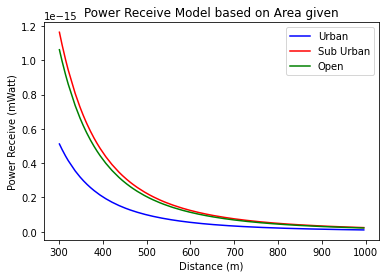

In [51]:
fig, ax = plt.subplots()
ax.plot(d_sort,PrxUrban, color='b', label='Urban')
ax.plot(d_sort,PrxSubUrban, color='r', label='Sub Urban')
ax.plot(d_sort,PrxOpen, color='g', label='Open')
ax.set_title('Power Receive Model based on Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Power Receive (mWatt)')
ax.legend(loc='upper right')
plt.show()

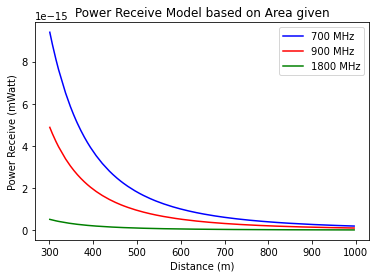

In [52]:
fig, ax = plt.subplots()
ax.plot(d_sort,PrxUrban700, color='b', label='700 MHz')
ax.plot(d_sort,PrxUrban900, color='r', label='900 MHz')
ax.plot(d_sort,PrxUrban1800, color='g', label='1800 MHz')
ax.set_title('Power Receive Model based on Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Power Receive (mWatt)')
ax.legend(loc='upper right')
plt.show()

Creating **SNR** Model

In [53]:
def SNRValue(Prx,BW):

  # Calculating No to BW
  No=-174+10*np.log10(BW)

  # Converting No in BW to Numeric
  NoW=LtN(No)

  # Calculating SNR Value
  SNR= Prx/NoW

  return SNR

In [54]:
# The Given Input of the SNR Model for Different Area and Frequency

# prx is receiver power value derived from the previous calculation value
# bw is the given bandwith value

Prx1 = PrxUrban
Prx2 = PrxSubUrban
Prx3 = PrxOpen
Prx4 = PrxUrban700
Prx5 = PrxUrban900
Prx6 = PrxUrban1800
BW   = 50000000

In [55]:
# Define SNR Model for Area by the given input
SNRUrban = SNRValue(Prx1,BW)
SNRSubUrban = SNRValue(Prx2,BW)
SNROpen = SNRValue(Prx3,BW)

# Define SNR Model for Frequency by the given input
SNRUrban700 = SNRValue(Prx4,BW)
SNRUrban900 = SNRValue(Prx5,BW)
SNRUrban1800 = SNRValue(Prx6,BW)

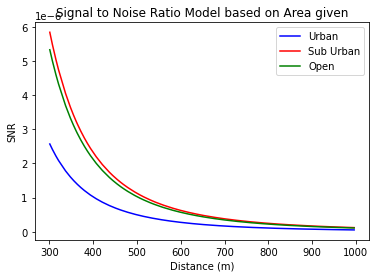

In [56]:
fig, ax = plt.subplots()
ax.plot(d_sort,SNRUrban, color='b', label='Urban')
ax.plot(d_sort,SNRSubUrban, color='r', label='Sub Urban')
ax.plot(d_sort,SNROpen, color='g', label='Open')
ax.set_title('Signal to Noise Ratio Model based on Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('SNR')
ax.legend(loc='upper right')
plt.show()

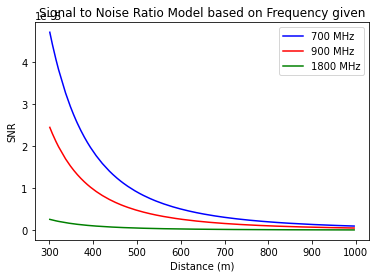

In [57]:
fig, ax = plt.subplots()
ax.plot(d_sort,SNRUrban700, color='b', label='700 MHz')
ax.plot(d_sort,SNRUrban900, color='r', label='900 MHz')
ax.plot(d_sort,SNRUrban1800, color='g', label='1800 MHz')
ax.set_title('Signal to Noise Ratio Model based on Frequency given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('SNR')
ax.legend(loc='upper right')
plt.show()

Creating **Cell Capacity** Model

In [58]:
def Capacity(SNR,BW):

  # Calculating Cell Capacity
  Celcap = BW*np.log2(1+SNR)

  return Celcap

In [59]:
# The Given Input of the Capacity Model for Different Area and Frequency

# SNR is signal to noise ratio value derived from the previous calculation value
# BW is the given bandwith value

SNR1 = SNRUrban
SNR2 = SNRSubUrban
SNR3 = SNROpen
SNR4 = SNRUrban700
SNR5 = SNRUrban900
SNR6 = SNRUrban1800
BW   = 50000000

In [60]:
# Define Cell Capacity Model for Area by the given input
celcapUrban = Capacity(SNR1, BW)
celcapSubUrban = Capacity(SNR2, BW)
celcapOpen = Capacity(SNR3, BW)

# Define Cell Capacity Model for Frequency by the given input
celcapUrban700 = Capacity(SNR4, BW)
celcapUrban900 = Capacity(SNR5, BW)
celcapUrban1800 = Capacity(SNR6, BW)

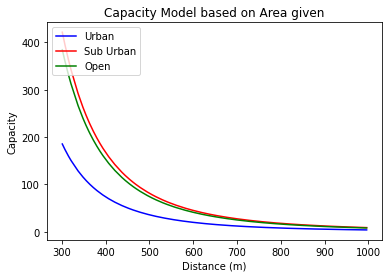

In [61]:
fig, ax = plt.subplots()
ax.plot(d_sort,celcapUrban, color='b', label='Urban')
ax.plot(d_sort,celcapSubUrban, color='r', label='Sub Urban')
ax.plot(d_sort,celcapOpen, color='g', label='Open')
ax.set_title('Capacity Model based on Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Capacity')
ax.legend(loc='upper left')
plt.show()

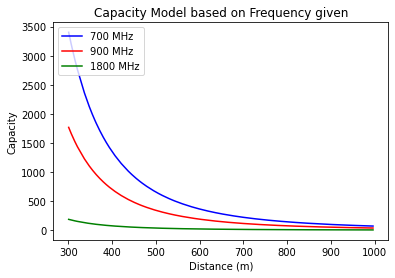

In [62]:
fig, ax = plt.subplots()
ax.plot(d_sort,celcapUrban700, color='b', label='700 MHz')
ax.plot(d_sort,celcapUrban900, color='r', label='900 MHz')
ax.plot(d_sort,celcapUrban1800, color='g', label='1800 MHz')
ax.set_title('Capacity Model based on Frequency given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Capacity')
ax.legend(loc='upper left')
plt.show()